# Predicting the value of players in FIFA 19 using KNN
---

# 1. Import and preview dataset


In [1]:
import pandas as pd

# Specify the file path and encoding
file_path = 'All NBA players list.csv'
encoding = 'latin1'  # or 'ISO-8859-1'

try:
    # Attempt to read the CSV file
    data = pd.read_csv(file_path, encoding=encoding)

    # Display the first few rows to verify
    print(data.head())

    # Further data processing or analysis can follow here

except UnicodeDecodeError as e:
    print(f"UnicodeDecodeError: {e}. Try specifying a different encoding.")
except Exception as e:
    print(f"Error: {e}")



            Player       Team Age     Height Weight               COLLEGE  \
0    A.J. Lawson        DAL    23      6-6      179      South Carolina     
1       AJ Green        MIL    24      6-4      190       Northern Iowa     
2   Aaron Gordon        DEN    28      6-8      235             Arizona     
3  Aaron Nesmith        IND    24      6-6      215          Vanderbilt     
4  Aaron Wiggins        OKC    25      6-5      190            Maryland     

        COUNTRY   DRAFT    YEAR DRAFT ROUND  ...    GP  PTS  REB   AST NETRTG  \
0      Canada                                ...   1.1  0.3    0   -15    3.6   
1         USA                                ...   2.8  1.5  0.3  -3.8      0   
2         USA      2014       1           4  ...  14.3  7.3  4.4  -3.9    8.4   
3         USA      2020       1          14  ...  10.5  4.9  2.2   2.6    3.6   
4         USA      2021       2          55  ...   6.2  3.2    1   8.4    6.1   

  OREB% DREB%  USG%  TS% AST%  
0   6.7  15.6  55.

In [2]:
#Check number of columns in dataframe
num_col = len(data.columns)
print("Number of columns in dataframe:",num_col)

Number of columns in dataframe: 21


In [3]:
#Unhide all columns and then preview first 5 rows of dataframe to indentify columns
pd.options.display.max_columns = num_col
data.head()

,Player,Team,Age,Height,Weight,COLLEGE,COUNTRY,DRAFT,YEAR,DRAFT ROUND,DRAFT NUMBER,GP,PTS,REB,AST,NETRTG,OREB%,DREB%,USG%,TS%,AST%
0,A.J. Lawson,DAL,23,6-6,179,South Carolina,Canada,,,,10,1.1,0.3,0,-15,3.6,6.7,15.6,55.7,0,0.0
1,AJ Green,MIL,24,6-4,190,Northern Iowa,USA,,,,6,2.8,1.5,0.3,-3.8,0,12.7,11.5,49.1,4,0.0
2,Aaron Gordon,DEN,28,6-8,235,Arizona,USA,2014,1,4,12,14.3,7.3,4.4,-3.9,8.4,12.2,15.3,66,18,0.0
3,Aaron Nesmith,IND,24,6-6,215,Vanderbilt,USA,2020,1,14,17,10.5,4.9,2.2,2.6,3.6,12,14.5,56.6,8.1,0.0
4,Aaron Wiggins,OKC,25,6-5,190,Maryland,USA,2021,2,55,10,6.2,3.2,1,8.4,6.1,12.2,17.2,59.8,9.7,0.0


In [4]:
#Assign all columns to variable and then preview columns
stats_columns = data.columns
stats_columns

Index(['Player', 'Team', 'Age', 'Height', 'Weight', 'COLLEGE', 'COUNTRY',
       'DRAFT', 'YEAR', 'DRAFT ROUND', 'DRAFT NUMBER', 'GP', 'PTS', 'REB',
       'AST', 'NETRTG', 'OREB%', 'DREB%', 'USG%', 'TS%', 'AST%'],
      dtype='object')

# 2. Data Cleaning


In [5]:
def check_missing_info(csv_file_path):
    # Read the CSV file
    df = pd.read_csv(csv_file_path)

    # Check for missing values in each column
    missing_info = df.isnull().sum()

    # Filter out columns with no missing values
    missing_info = missing_info[missing_info > 0]

    return missing_info.to_dict()


In [6]:
import pandas as pd

def clean_data(csv_file_path):
    # Step 1: Load the data
    df = pd.read_csv(csv_file_path)

    # Step 2: Inspect the data
    print("Data Inspection:")
    print(df.head())  # Display the first few rows to inspect the data structure

    # Step 3: Handle missing values
    print("\nHandling Missing Values:")
    print("Number of missing values per column:")
    print(df.isnull().sum())  # Display the count of missing values in each column

    # Replace empty cells (NaN values) with 0
    df = df.fillna(0)
    print("After filling missing values with 0:")
    print(df.head())

    # Step 4: Convert data types if needed
    # Example: Convert 'Year' column to integer if it represents years
    df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce').fillna(0).astype(int)

    # Step 5: Remove duplicates
    print("\nRemoving Duplicates:")
    df = df.drop_duplicates()
    print("Number of duplicates removed:", df.duplicated().sum())


    # Step 6: Save cleaned data
    cleaned_file_path = 'cleaned_data.csv'
    df.to_csv(cleaned_file_path, index=False)
    print(f"\nCleaned data saved to {cleaned_file_path}.")

csv_file_path="All NBA players list.csv"
clean_data(csv_file_path)

Data Inspection:
            Player       Team Age     Height Weight               COLLEGE  \
0    A.J. Lawson        DAL    23      6-6      179      South Carolina     
1       AJ Green        MIL    24      6-4      190       Northern Iowa     
2   Aaron Gordon        DEN    28      6-8      235             Arizona     
3  Aaron Nesmith        IND    24      6-6      215          Vanderbilt     
4  Aaron Wiggins        OKC    25      6-5      190            Maryland     

        COUNTRY   DRAFT    YEAR DRAFT ROUND DRAFT NUMBER    GP  PTS  REB  \
0      Canada                                         10   1.1  0.3    0   
1         USA                                          6   2.8  1.5  0.3   
2         USA      2014       1           4           12  14.3  7.3  4.4   
3         USA      2020       1          14           17  10.5  4.9  2.2   
4         USA      2021       2          55           10   6.2  3.2    1   

    AST NETRTG OREB% DREB%  USG%  TS%  AST%  
0   -15    3.6   

In [7]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('cleaned_data.csv')

# Remove duplicate rows based on 'Player' column
df = df.drop_duplicates(subset=['Player'])

# Save the cleaned DataFrame back to a new CSV file
df.to_csv('cleaned_data_no_duplicates.csv', index=False)

print(f"Duplicate rows based on 'Player' column removed. New CSV saved as 'cleaned_data_no_duplicates.csv'.")


Duplicate rows based on 'Player' column removed. New CSV saved as 'cleaned_data_no_duplicates.csv'.


There are now no rows with missing information, so we can continue to select the appropriate data for the KNN algorithm

# 3. Convert numerical inforamtion stored as strings to correct data format


In [8]:
import pandas as pd

def convert_year_column(csv_file_path):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file_path)

    # Convert 'YEAR' column to numeric
    df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce').fillna(0).astype(int)

    # Convert 'YEAR' column back to string
    df['YEAR'] = df['YEAR'].astype(str)

    # Display the updated DataFrame with correct data types
    print("Updated DataFrame with correct data types:")
    print(df.dtypes)

    # Optionally, save the updated DataFrame to a new CSV file
    cleaned_file_path = 'cleaned_data.csv'
    df.to_csv(cleaned_file_path, index=False)
    print(f"\nCleaned data saved to {cleaned_file_path}.")

csv_file_path = 'cleaned_data_no_duplicates.csv'  # Replace with your actual file path
convert_year_column(csv_file_path)


Updated DataFrame with correct data types:
Player           object
Team             object
Age              object
Height           object
Weight           object
COLLEGE          object
COUNTRY          object
DRAFT            object
YEAR             object
DRAFT ROUND      object
DRAFT NUMBER     object
GP               object
PTS              object
REB              object
AST              object
NETRTG           object
OREB%            object
DREB%            object
USG%             object
TS%              object
AST%            float64
dtype: object

Cleaned data saved to cleaned_data.csv.


Columns in the dataset:
Index(['Player', 'Team', 'Age', 'Height', 'Weight', 'COLLEGE', 'COUNTRY',
       'DRAFT', 'YEAR', 'DRAFT ROUND', 'DRAFT NUMBER', 'GP', 'PTS', 'REB',
       'AST', 'NETRTG', 'OREB%', 'DREB%', 'USG%', 'TS%', 'AST%'],
      dtype='object')


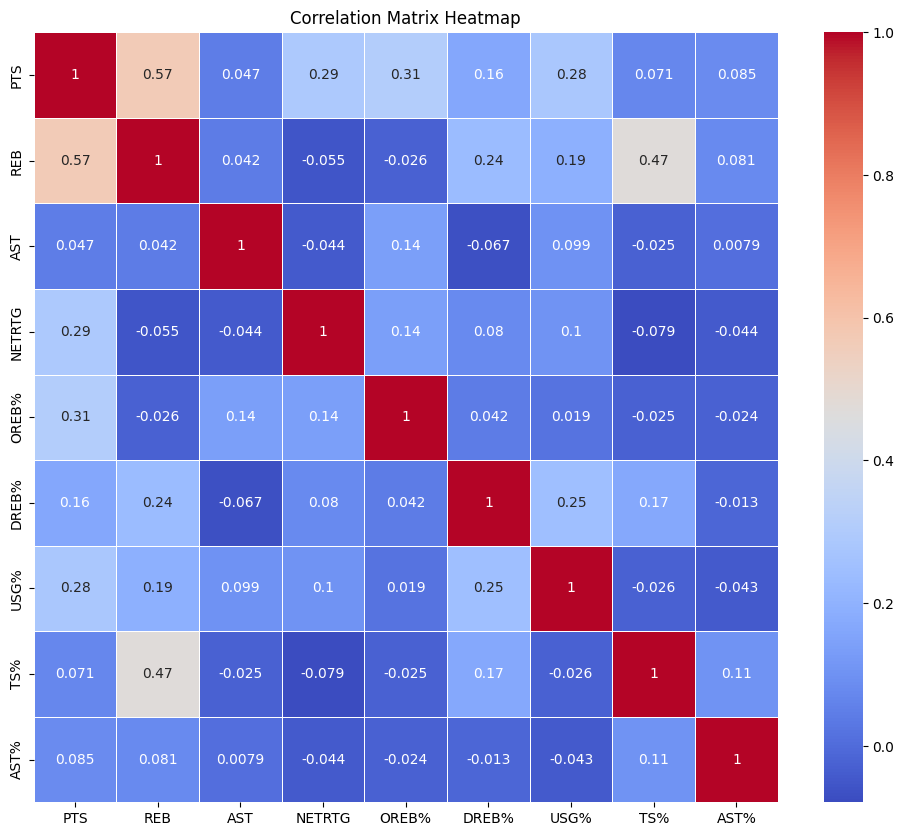


Top significant columns for predicting 'PTS':
['PTS', 'REB', 'OREB%', 'NETRTG', 'USG%', 'DREB%', 'AST%', 'TS%', 'AST']


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_significant_columns(csv_file_path):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file_path)

    # Display the list of columns and their data types
    print("Columns in the dataset:")
    print(df.columns)

    # Clean numeric columns - Convert to numeric and handle errors
    numeric_columns = ['PTS', 'REB', 'AST', 'NETRTG', 'OREB%', 'DREB%', 'USG%', 'TS%', 'AST%']
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Remove rows with NaN values in numeric columns
    df = df.dropna(subset=numeric_columns)

    # Calculate correlation matrix
    corr_matrix = df[numeric_columns].corr()

    # Plot correlation matrix as a heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix Heatmap')
    plt.show()

    # Identify top correlated features with a specific target (if applicable)
    target_variable = 'PTS'  # Example: Predicting based on points scored (PTS)
    corr_with_target = corr_matrix[target_variable].sort_values(ascending=False)

    # Display significant columns based on correlation with the target
    significant_columns = corr_with_target.index.tolist()
    print(f"\nTop significant columns for predicting '{target_variable}':")
    print(significant_columns)

    return significant_columns
# Example usage
csv_file_path = 'cleaned_data_no_duplicates.csv'
# Replace with your actual file path
significant_columns = analyze_significant_columns(csv_file_path)


In [10]:

# Attributes for predicting top players for shooters (PTS and TS%)
attributes_shooters = ['PTS', 'TS%']

# Attributes for predicting top players for forwards (PTS, REB, AST, NETRTG, OREB%, DREB%, USG%, TS%, AST%)
attributes_forwards = [ 'REB', ]

# Attributes for predicting top players for centers (PTS, REB, AST, NETRTG, OREB%, DREB%, USG%, TS%, AST%)
attributes_centers = ['PTS']

# Attributes for predicting top players for point guards (PG)
attributes_point_guards = ['PTS', 'AST', 'TOV%', 'USG%', '3P%']

# Attributes for predicting top players for small forwards (SF)
attributes_small_forwards = ['PTS', 'REB', 'AST', 'DEFRTG', 'STL%']

print("Attributes for predicting top players for shooters:")
print(attributes_shooters)

print("\nAttributes for predicting top players for forwards:")
print(attributes_forwards)

print("\nAttributes for predicting top players for centers:")
print(attributes_centers)

print("Attributes for predicting top players for point guards (PG):")
print(attributes_point_guards)

print("\nAttributes for predicting top players for small forwards (SF):")
print(attributes_small_forwards)


Attributes for predicting top players for shooters:
['PTS', 'TS%']

Attributes for predicting top players for forwards:
['REB']

Attributes for predicting top players for centers:
['PTS']
Attributes for predicting top players for point guards (PG):
['PTS', 'AST', 'TOV%', 'USG%', '3P%']

Attributes for predicting top players for small forwards (SF):
['PTS', 'REB', 'AST', 'DEFRTG', 'STL%']


The specified numeric columns to numeric type, removes rows with NaN values, computes a correlation matrix for these columns, and visualizes correlations using a heatmap. It identifies top correlated features with 'PTS' (points scored), aiding in understanding which metrics most influence player performance based on data analysis.

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def train_and_predict_top_shooters(csv_file_path, significant_columns, target_variable='PTS', top_n=10):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file_path)

    # Clean numeric columns - Convert to numeric and handle errors
    numeric_columns = ['PTS', 'REB', 'AST', 'NETRTG', 'OREB%', 'DREB%', 'USG%', 'TS%', 'AST%']
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Remove rows with NaN values in numeric columns
    df = df.dropna(subset=numeric_columns)

    # Define features (X) and target variable (y)
    X = df[significant_columns]
    y = df[target_variable]

    # Scale features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train a RandomForestRegressor model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_scaled, y)

    # Predict target variable for all players in the dataset
    df['Predicted_' + target_variable] = model.predict(scaler.transform(df[significant_columns]))

    # Example: Assuming shooters are defined by high points (PTS) and high field goal percentage (TS%)
    shooters_criteria = (df['PTS'] > df['PTS'].mean()) & (df['TS%'] > df['TS%'].mean())
    shooters = df[shooters_criteria]

    # Rank shooters by predicted target variable and select top N
    top_shooters = shooters.sort_values(by='Predicted_' + target_variable, ascending=False).head(top_n)

    return top_shooters[['Player', 'Predicted_' + target_variable]]  # Return only player and predicted variable

# Example usage
csv_file_path = 'cleaned_data_no_duplicates.csv'  # Replace with your actual file path
significant_columns = ['PTS', 'REB', 'AST', 'NETRTG', 'OREB%', 'DREB%', 'USG%', 'TS%', 'AST%']
top_n = 10  # Define the number of top shooters to display

# Train the model and predict top 10 shooters based on 'PTS'
top_shooters_predicted = train_and_predict_top_shooters(csv_file_path, significant_columns, target_variable='PTS')
print("Top 10 Predicted Shooters based on PTS:")
print(top_shooters_predicted)

Top 10 Predicted Shooters based on PTS:
                      Player  Predicted_PTS
11           Anthony Davis           14.708
164           Nikola Jokic           13.311
283           Kevon Looney           13.118
377         Nikola Vucevic           12.570
112              Josh Hart           11.416
103            Joel Embiid           11.148
247       Domantas Sabonis           11.062
253  Giannis Antetokounmpo           11.056
98            Jayson Tatum            9.663
556      LaMarcus Aldridge            9.606


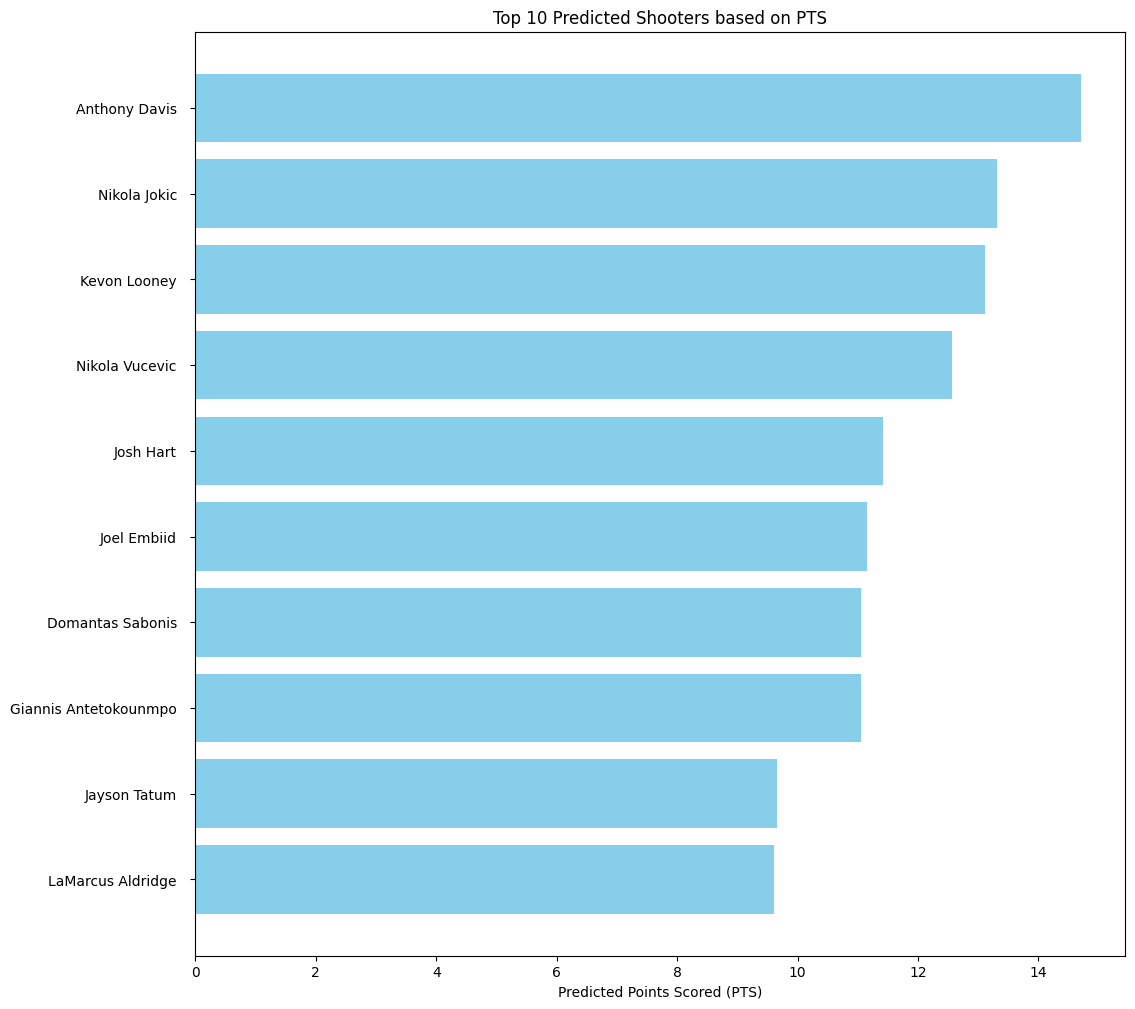

In [12]:
# Plotting the top shooters based on PTS
plt.figure(figsize=(12, 12))
plt.barh(top_shooters_predicted['Player'], top_shooters_predicted['Predicted_PTS'], color='skyblue')
plt.xlabel('Predicted Points Scored (PTS)')
plt.title(f'Top {top_n} Predicted Shooters based on PTS')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest predicted at the top
plt.show()


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

def train_and_predict_top_forwards(csv_file_path, significant_columns, target_variable='REB', top_n=10):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file_path)

    # Clean numeric columns - Convert to numeric and handle errors
    numeric_columns = ['PTS', 'REB', 'AST', 'NETRTG', 'OREB%', 'DREB%', 'USG%', 'TS%', 'AST%']
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Remove rows with NaN values in numeric columns
    df = df.dropna(subset=numeric_columns)

    # Define features (X) and target variable (y)
    X = df[significant_columns]
    y = df[target_variable]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train a RandomForestRegressor model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train_scaled, y_train)

    # Predict target variable for all players in the dataset
    df['Predicted_' + target_variable] = model.predict(scaler.transform(df[significant_columns]))

    # Rank players by predicted target variable and select top N forwards
    top_forwards = df.sort_values(by='Predicted_' + target_variable, ascending=False).head(top_n)

    return top_forwards[['Player'] + significant_columns + ['Predicted_' + target_variable]]

# Example usage
csv_file_path = 'cleaned_data_no_duplicates.csv'  # Replace with your actual file path
significant_columns = ['PTS', 'REB', 'AST', 'NETRTG', 'OREB%', 'DREB%', 'USG%', 'TS%', 'AST%']

# Train the model and predict top 10 forwards based on 'REB'
top_forwards_predicted = train_and_predict_top_forwards(csv_file_path, significant_columns, target_variable='REB') #Rebounds.
print("Top 10 Predicted Forwards based on REB:")
print(top_forwards_predicted)

Top 10 Predicted Forwards based on REB:
                  Player   PTS   REB   AST  NETRTG  OREB%  DREB%  USG%   TS%  \
613          John Wall     5.7  11.5  -0.9     1.4   14.2   32.5  52.8  49.6   
320         Trae Young     3.7  10.2  -7.3     1.9    7.5   33.5  52.1  43.0   
134       LeBron James     6.8   8.8  -4.3     2.1   14.4   27.7  63.7  35.8   
164       Nikola Jokic    13.4   8.7   2.0     9.2   26.0   29.1  62.5  37.0   
402        Ben Simmons     7.9   8.8  12.9     6.6   17.1   16.2  56.2  32.3   
208  Tyrese Haliburton     4.8   8.2   4.9     2.4   11.5   21.4  62.6  32.0   
138        Luka Doncic     9.5   8.1   4.3     1.8   21.1   32.4  55.6  35.0   
91        James Harden     4.5   8.0  -9.8     1.3   10.2   22.0  61.6  35.0   
238       De'Aaron Fox     5.4   7.7  -2.8     3.9    8.8   30.5  52.4  32.3   
85       Jalen Brunson     3.3   7.5   0.0     1.5    7.2   35.2  53.6  33.6   

     AST%  Predicted_REB  
613   0.0         10.428  
320   0.0          9.975 

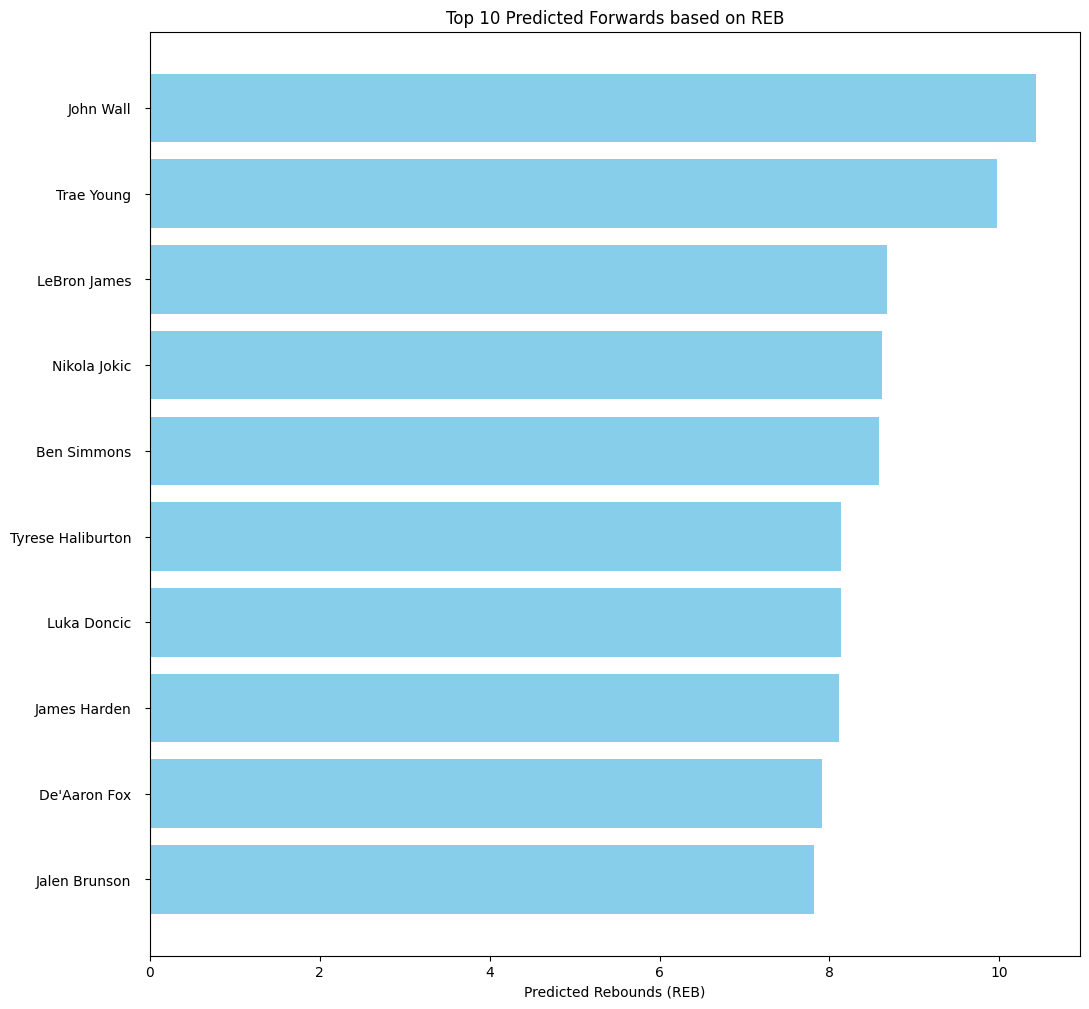

In [14]:
# Plotting the top forwards based on REB
plt.figure(figsize=(12, 12))
plt.barh(top_forwards_predicted['Player'], top_forwards_predicted['Predicted_REB'], color='skyblue')
plt.xlabel('Predicted Rebounds (REB)')
plt.title(f'Top {top_n} Predicted Forwards based on REB')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest predicted at the top
plt.show()

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Function to train the model and predict top centers
def train_and_predict_top_centers(csv_file_path, significant_columns, target_variable='PTS', top_n=10):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file_path)

    # Clean numeric columns - Convert to numeric and handle errors
    numeric_columns = ['PTS', 'REB', 'AST', 'NETRTG', 'OREB%', 'DREB%', 'USG%', 'TS%', 'AST%']
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Remove rows with NaN values in numeric columns
    df = df.dropna(subset=numeric_columns)

    # Define features (X) and target variable (y)
    X = df[significant_columns]
    y = df[target_variable]

    # Scale features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train a RandomForestRegressor model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_scaled, y)

    # Predict target variable for all players in the dataset
    df['Predicted_' + target_variable] = model.predict(scaler.transform(df[significant_columns]))

    # Rank players by predicted target variable and select top N centers
    top_centers = df.sort_values(by='Predicted_' + target_variable, ascending=False).head(top_n)

    return top_centers[['Player'] + significant_columns + ['Predicted_' + target_variable]]

# Example usage
csv_file_path = 'cleaned_data_no_duplicates.csv'  # Replace with your actual file path
significant_columns = ['PTS', 'REB', 'AST', 'NETRTG', 'OREB%', 'DREB%', 'USG%', 'TS%', 'AST%']
top_n = 10

# Train the model and predict top 10 centers based on 'PTS'
top_centers_predicted = train_and_predict_top_centers(csv_file_path, significant_columns, target_variable='PTS', top_n=top_n)
print("Top 10 Predicted Centers based on PTS:")
print(top_centers_predicted)

Top 10 Predicted Centers based on PTS:
                  Player   PTS  REB   AST  NETRTG  OREB%  DREB%  USG%   TS%  \
11       Anthony Davis    15.6  4.0  -3.2     7.8   29.7   24.6  66.5  15.5   
94       Jarrett Allen    13.8  1.3  -4.9    12.2   31.3   18.9  70.2   6.8   
164       Nikola Jokic    13.4  8.7   2.0     9.2   26.0   29.1  62.5  37.0   
283       Kevon Looney    13.1  3.3   7.9    16.4   30.0   10.3  58.4  16.7   
377     Nikola Vucevic    12.4  3.2 -10.5     6.8   27.1   24.2  52.0  16.2   
104  Jonas Valanciunas    11.0  1.3 -20.4    17.6   30.2   28.0  58.6  11.6   
112          Josh Hart    11.5  4.5  -4.3     6.5   22.2   16.3  55.2  15.1   
16        Bobby Portis    11.3  1.0   7.7     9.2   27.7   25.5  51.2   5.3   
103        Joel Embiid    10.8  5.7   9.3     8.4   16.9   35.8  59.2  24.6   
247   Domantas Sabonis    11.0  4.7  -9.5    10.5   16.7   22.1  51.7  21.6   

     AST%  Predicted_PTS  
11    0.0         14.708  
94    0.0         13.866  
164   0.0 

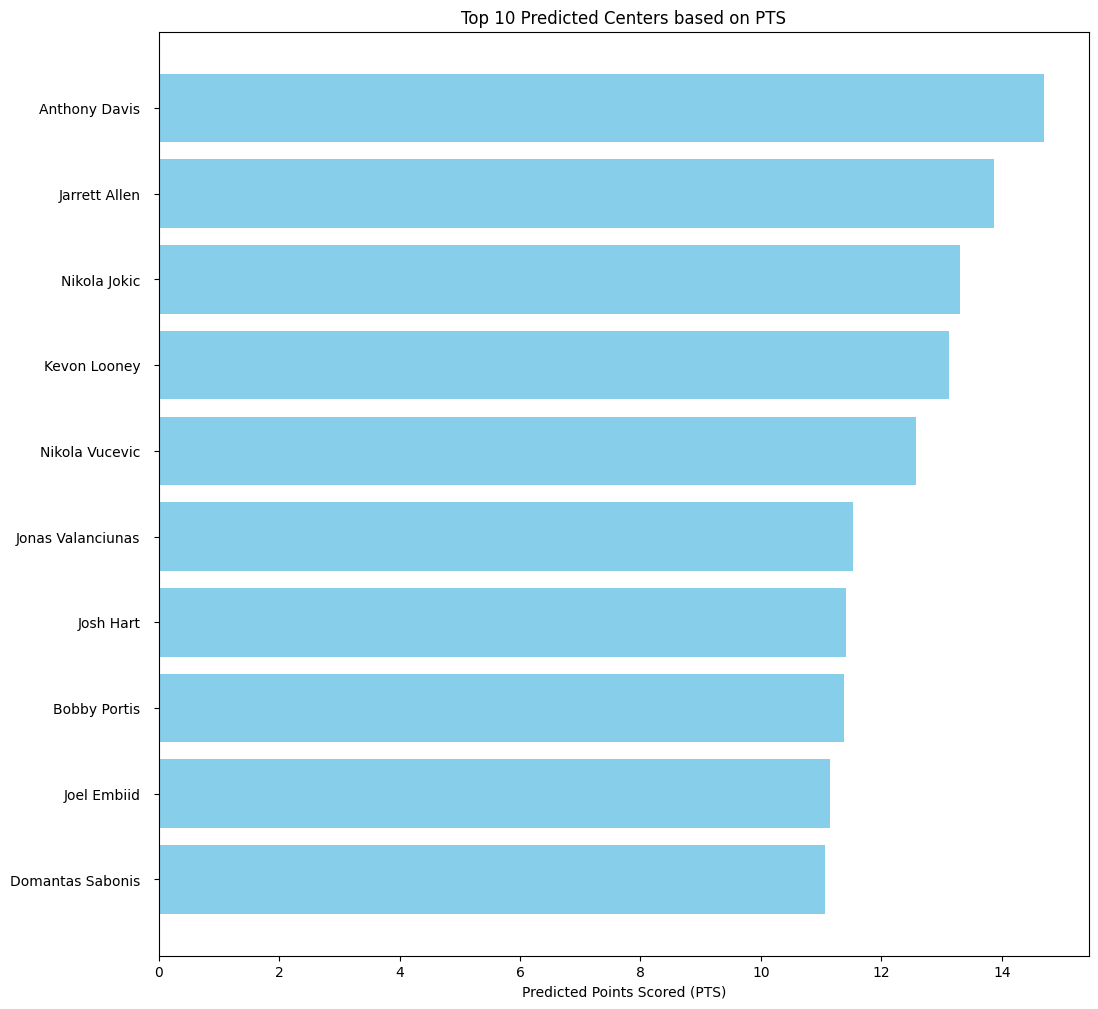

In [16]:
# Plotting the top centers based on PTS
plt.figure(figsize=(12, 12))
plt.barh(top_centers_predicted['Player'], top_centers_predicted['Predicted_PTS'], color='skyblue')
plt.xlabel('Predicted Points Scored (PTS)')
plt.title(f'Top {top_n} Predicted Centers based on PTS')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest predicted at the top
plt.show()

In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Function to train the model and predict top point guards
def train_and_predict_top_point_guards(csv_file_path, significant_columns, target_variable='PTS', top_n=10):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file_path)

    # Clean numeric columns - Convert to numeric and handle errors
    numeric_columns = ['PTS', 'REB', 'AST', 'NETRTG', 'OREB%', 'DREB%', 'USG%', 'TS%', 'AST%']
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Remove rows with NaN values in numeric columns
    df = df.dropna(subset=numeric_columns)

    # Define features (X) and target variable (y)
    X = df[significant_columns]
    y = df[target_variable]

    # Scale features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train a RandomForestRegressor model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_scaled, y)

    # Predict target variable for all players in the dataset
    df['Predicted_' + target_variable] = model.predict(scaler.transform(df[significant_columns]))

    # Example: Assuming point guards are defined by high points (PTS) and high assists (AST)
    point_guards_criteria = (df['PTS'] > df['PTS'].mean()) & (df['AST'] > df['AST'].mean())
    point_guards = df[point_guards_criteria]

    # Rank point guards by predicted target variable and select top N
    top_point_guards = point_guards.sort_values(by='Predicted_' + target_variable, ascending=False).head(top_n)

    return top_point_guards[['Player'] + significant_columns + ['Predicted_' + target_variable]]

# Example usage
csv_file_path = 'cleaned_data_no_duplicates.csv'  # Replace with your actual file path
significant_columns = ['PTS', 'REB', 'AST', 'NETRTG', 'OREB%', 'DREB%', 'USG%', 'TS%', 'AST%']
top_n = 10

# Train the model and predict top 10 point guards based on 'PTS'
top_point_guards_predicted = train_and_predict_top_point_guards(csv_file_path, significant_columns, target_variable='PTS', top_n=top_n)
print("Top 10 Predicted Point Guards based on PTS:")
print(top_point_guards_predicted)

Top 10 Predicted Point Guards based on PTS:
              Player   PTS  REB  AST  NETRTG  OREB%  DREB%  USG%   TS%  AST%  \
11   Anthony Davis    15.6  4.0 -3.2     7.8   29.7   24.6  66.5  15.5   0.0   
94   Jarrett Allen    13.8  1.3 -4.9    12.2   31.3   18.9  70.2   6.8   0.0   
164   Nikola Jokic    13.4  8.7  2.0     9.2   26.0   29.1  62.5  37.0   0.0   
283   Kevon Looney    13.1  3.3  7.9    16.4   30.0   10.3  58.4  16.7   0.0   
112      Josh Hart    11.5  4.5 -4.3     6.5   22.2   16.3  55.2  15.1   0.0   
16    Bobby Portis    11.3  1.0  7.7     9.2   27.7   25.5  51.2   5.3   0.0   
103    Joel Embiid    10.8  5.7  9.3     8.4   16.9   35.8  59.2  24.6   0.0   
187    Rudy Gobert     9.8  1.6  9.8     8.4   22.9   13.9  65.2   6.6   0.0   
98    Jayson Tatum     9.7  6.3  9.2     2.3   22.4   28.0  54.9  25.1   0.0   
240  Deandre Ayton     9.7  1.0 -2.5     9.6   21.3   18.6  55.3   4.3   0.0   

     Predicted_PTS  
11          14.708  
94          13.866  
164         

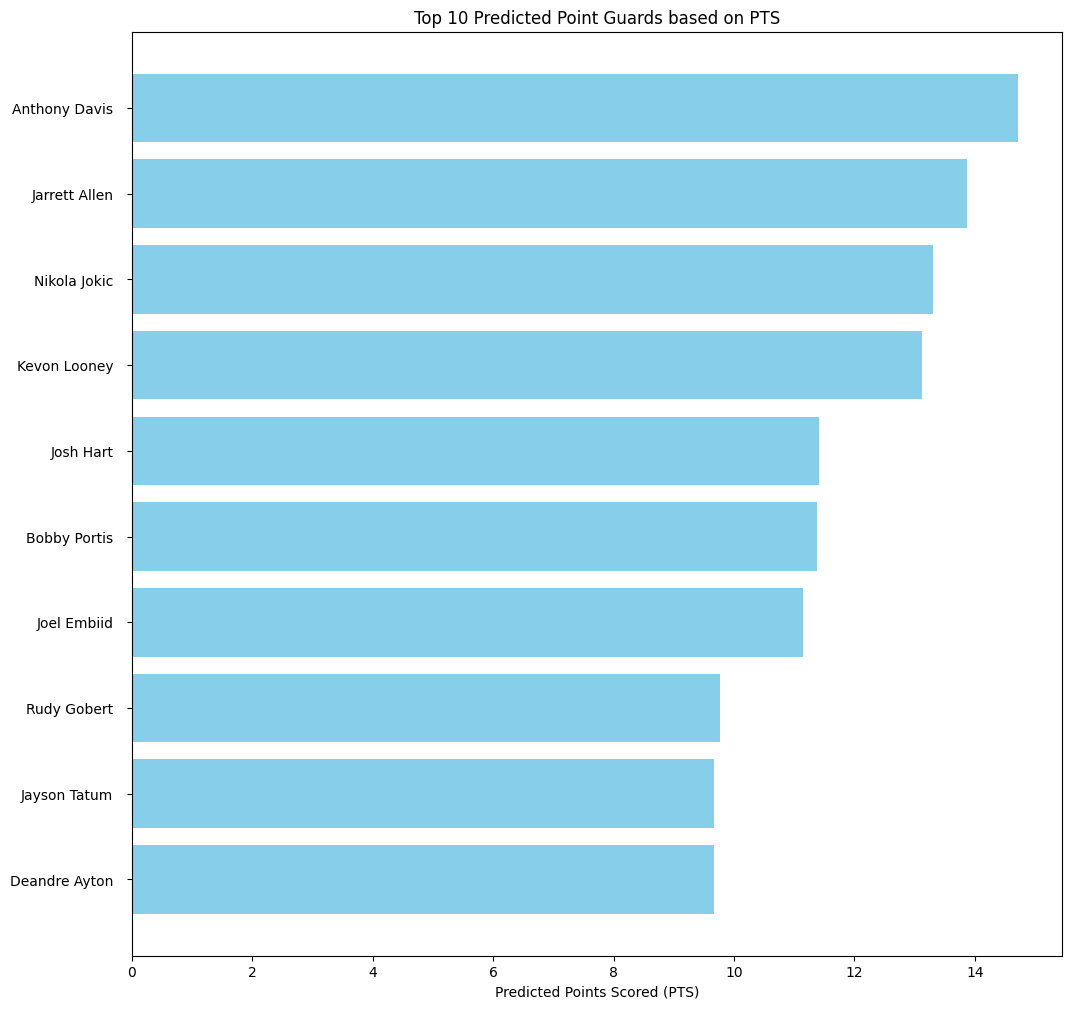

In [18]:
# Plotting the top point guards based on PTS
plt.figure(figsize=(12, 12))
plt.barh(top_point_guards_predicted['Player'], top_point_guards_predicted['Predicted_PTS'], color='skyblue')
plt.xlabel('Predicted Points Scored (PTS)')
plt.title(f'Top {top_n} Predicted Point Guards based on PTS')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest predicted at the top
plt.show()

Top 10 Predicted Small Forwards based on PTS:
                      Player  Predicted_PTS
11           Anthony Davis           14.708
94           Jarrett Allen           13.866
164           Nikola Jokic           13.311
283           Kevon Looney           13.118
377         Nikola Vucevic           12.570
104      Jonas Valanciunas           11.522
112              Josh Hart           11.416
103            Joel Embiid           11.148
247       Domantas Sabonis           11.062
253  Giannis Antetokounmpo           11.056


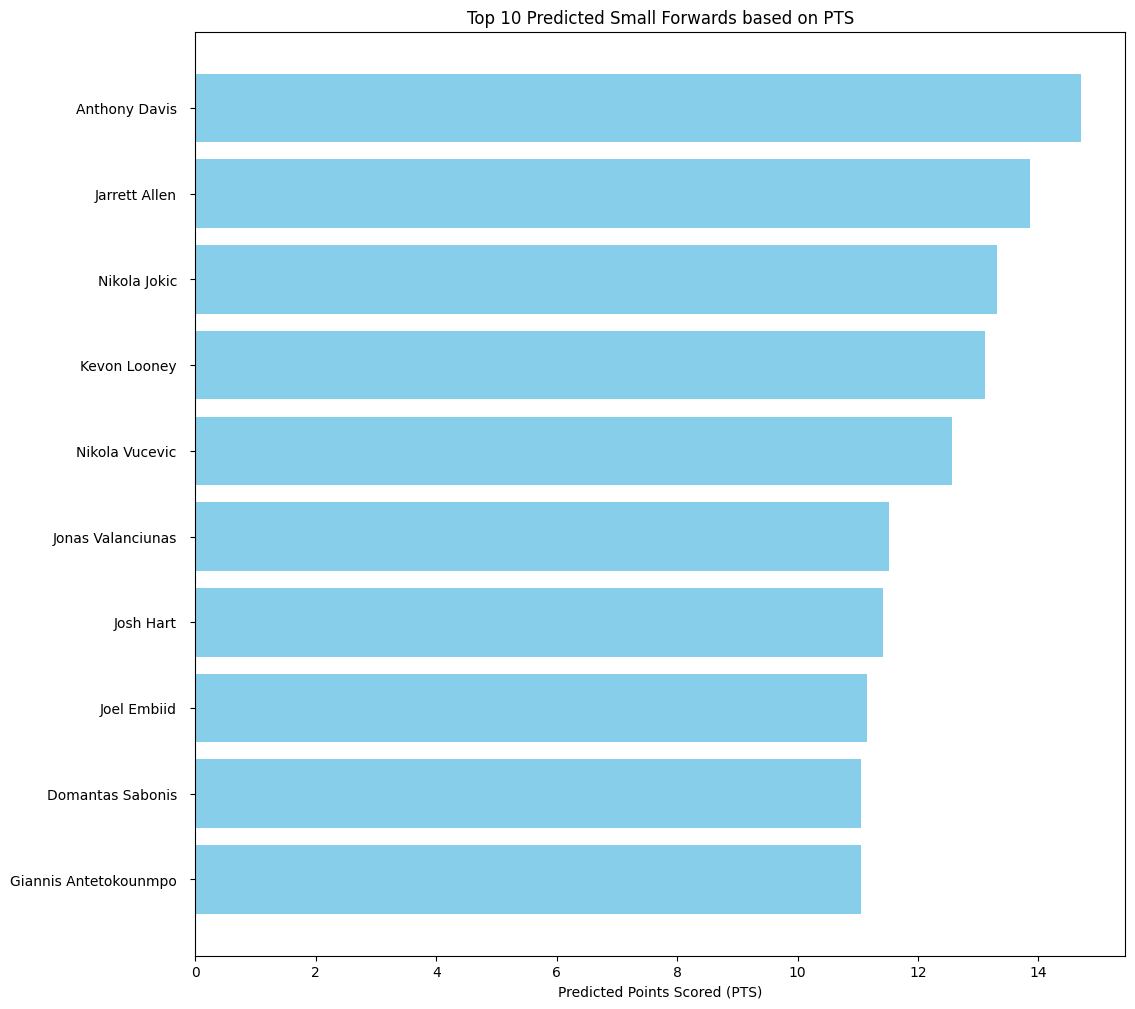

In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Function to train the model and predict top small forwards
def train_and_predict_top_small_forwards(csv_file_path, significant_columns, target_variable='PTS', top_n=10):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file_path)

    # Clean numeric columns - Convert to numeric and handle errors
    numeric_columns = ['PTS', 'REB', 'AST', 'NETRTG', 'OREB%', 'DREB%', 'USG%', 'TS%', 'AST%']
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Remove rows with NaN values in numeric columns
    df = df.dropna(subset=numeric_columns)

    # Define features (X) and target variable (y)
    X = df[significant_columns]
    y = df[target_variable]

    # Scale features using StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train a RandomForestRegressor model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_scaled, y)

    # Predict target variable for all players in the dataset
    df['Predicted_' + target_variable] = model.predict(scaler.transform(df[significant_columns]))

    # Example: Assuming small forwards are defined by high points (PTS) and good rebounding (REB)
    small_forwards_criteria = (df['PTS'] > df['PTS'].mean()) & (df['REB'] > df['REB'].mean())
    small_forwards = df[small_forwards_criteria]

    # Rank small forwards by predicted target variable and select top N
    top_small_forwards = small_forwards.sort_values(by='Predicted_' + target_variable, ascending=False).head(top_n)

    return top_small_forwards[['Player', 'Predicted_' + target_variable]]  # Return only player and predicted variable

# Example usage
csv_file_path = 'cleaned_data_no_duplicates.csv'  # Replace with your actual file path
significant_columns = ['PTS', 'REB', 'AST', 'NETRTG', 'OREB%', 'DREB%', 'USG%', 'TS%', 'AST%']
top_n = 10

# Train the model and predict top 10 small forwards based on 'PTS'
top_small_forwards_predicted = train_and_predict_top_small_forwards(csv_file_path, significant_columns, target_variable='PTS', top_n=top_n)
print("Top 10 Predicted Small Forwards based on PTS:")
print(top_small_forwards_predicted)




In [ ]:
# Plotting the top small forwards based on PTS
plt.figure(figsize=(12, 12))
plt.barh(top_small_forwards_predicted['Player'], top_small_forwards_predicted['Predicted_PTS'], color='skyblue')
plt.xlabel('Predicted Points Scored (PTS)')
plt.title(f'Top {top_n} Predicted Small Forwards based on PTS')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest predicted at the top
plt.show()